In [ ]:
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten ,MaxPooling2D ,Input
import matplotlib.pyplot as plt 
import numpy as np 





In [4]:
mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
input_shape=(28,28,1)

In [5]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [6]:
x_train =x_train.astype("float32")
x_test=x_test.astype("float32")


In [7]:
x_train =x_train/255
x_test=x_test/255
print("shape of Training:", x_train.shape)
print("shape of Testing:", x_test.shape)


shape of Training: (60000, 28, 28, 1)
shape of Testing: (10000, 28, 28, 1)


In [8]:
model=Sequential()
model.add(Input(shape=input_shape))  
model.add(Conv2D(32,kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │     1,081,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,130 (4.14 MB)

 Trainable params: 1,084,130 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.8049 - loss: 0.5468
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8961 - loss: 0.2879
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9126 - loss: 0.2383
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9212 - loss: 0.2100
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9312 - loss: 0.1850
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9370 - loss: 0.1649
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9439 - loss: 0.1467
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9530 - loss: 0.1297
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9538 - loss: 0.1238
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9606 - loss: 0.1082


In [13]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss" ,test_loss)
print("loss" ,test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9154 - loss: 0.2907
loss 0.2855631709098816
loss 0.9153000116348267


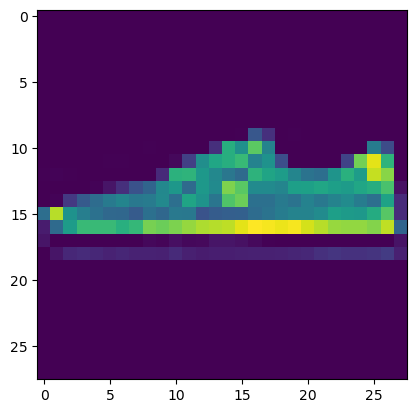

In [16]:
#image =x_train[14]
#plt.imshow(np.squeeze(image))
#plt.show()

In [17]:
#image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2]) 
#predict_model=model.predict([image]) 
#print("Predicted class :{}".format(np.argmax(predict_model)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Predicted class :7


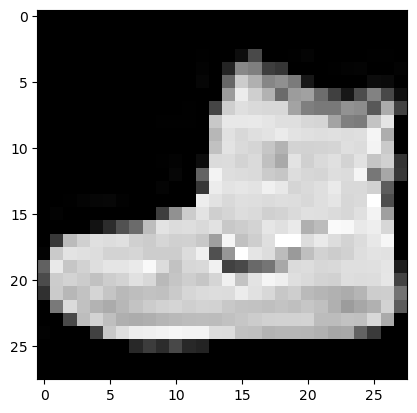

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Predicted class: Ankle boot
Predicted class :9


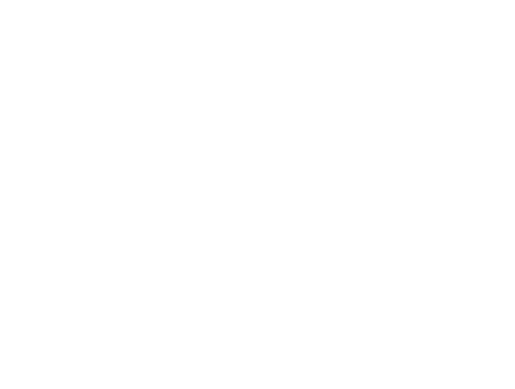

In [26]:
# Define the class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualize an example image from the training set
image = x_train[0]
plt.imshow(np.squeeze(image), cmap="gray")
plt.show()

# Reshape the image for prediction (adding batch dimension)
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

# Get the prediction
predict_model = model.predict(image)
predicted_class = np.argmax(predict_model)

# Display the predicted class name
print(f"Predicted class: {class_names[predicted_class]}")
print("Predicted class :{}".format(np.argmax(predict_model)))

## Display one image from each class
#plt.figure(figsize=(10, 10))
#for class_index in range(10):
#    # Find the first instance of each class in the training set
#    class_images = x_train[y_train == class_index]
#    example_image = class_images[0]  # Take the first instance of each class
#
#    # Plot each image
#    plt.subplot(2, 5, class_index + 1)  # 2 rows, 5 columns
#    plt.imshow(example_image, cmap="gray")
#    plt.title(class_names[class_index])
#    
plt.axis("off")

plt.show()